In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling as ms
from sklearn.model_selection import train_test_split

# Menyiapkan Dataframe

In [25]:
# mengimpor datasets used_cars.csv
data = pd.read_csv("used_cars.csv") 

In [26]:
# membuat dataframe
data = pd.DataFrame(data, columns=['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long'])

In [27]:
# melihat dataframe
data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,...,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,...,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [28]:
# menghapus fitur/kolom 'url', 'region_url', 'vin', 'image_url', 'description' karena tidak terlalu penting dalam proses clustering
data.drop(['url', 'region_url', 'vin', 'image_url', 'description'], axis=1, inplace=True)

In [29]:
# melihat dataframe setelah kolom 'url', 'region_url', 'vin', 'image_url', dan 'description' dihapus
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,NaN,ut,40.7372,-111.858
1,7034440610,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN,NaN,ut,40.5881,-111.884
2,7034440588,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,NaN,white,NaN,ut,40.5881,-111.884
3,7034440546,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN,NaN,ut,40.5881,-111.884
4,7034406932,salt lake city,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,4wd,NaN,pickup,white,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,7049052853,kennewick-pasco-richland,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,diesel,43406.0,clean,automatic,4wd,NaN,truck,grey,NaN,wa,46.2348,-119.128
19997,7049052797,kennewick-pasco-richland,12127,2018.0,nissan,sentra,NaN,4 cylinders,gas,32867.0,clean,automatic,fwd,NaN,sedan,NaN,NaN,wa,46.5642,-120.496
19998,7049049369,kennewick-pasco-richland,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,gas,17514.0,clean,automatic,4wd,NaN,SUV,NaN,NaN,wa,46.0783,-118.293
19999,7049042761,kennewick-pasco-richland,14661,2017.0,toyota,corolla,NaN,4 cylinders,gas,30486.0,clean,automatic,fwd,NaN,sedan,NaN,NaN,wa,46.5642,-120.496


# Null/NaN Handling

In [30]:
# memeriksa jumlah data setiap fitur
data.describe()

,id,price,year,odometer,county,lat,long
count,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


In [31]:
# menghapus fitur/kolom 'county' karena memiliki jumlah baris 0
data.drop('county', axis=1, inplace=True)

In [32]:
# memeriksa jumlah data setiap fitur setelah fitur/kolom 'county' dihapus
data.describe()

,id,price,year,odometer,lat,long
count,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,18970.000000,18970.000000
mean,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,40.394737,-86.300395
std,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,4.440290,18.219242
min,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,-51.812200,-155.901000
25%,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,37.273700,-80.166800
50%,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,38.258600,-77.514200
75%,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,44.439500,-76.238400
max,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,59.746600,9.095700


In [33]:
# menghapus baris yang memiliki nilai null/NaN
data = data.dropna()

In [34]:
# melihat dataframe setelah baris yang memiliki nilai null/NaN dihapus
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,ut,40.7372,-111.858
24,7034278551,salt lake city,4600,2008.0,honda,civic,good,4 cylinders,gas,110982.0,clean,automatic,fwd,mid-size,sedan,grey,ut,40.7499,-111.926
48,7033720842,salt lake city,28000,2004.0,ford,f550 mechanics service,good,10 cylinders,gas,67348.0,clean,automatic,4wd,full-size,truck,white,ut,40.3179,-111.704
57,7033598937,salt lake city,2500,2004.0,ford,mustang,good,6 cylinders,gas,129000.0,clean,manual,rwd,full-size,coupe,blue,ut,41.2627,-111.984
109,7050078672,st george,12000,2015.0,volkswagen,jetta,like new,4 cylinders,gas,65000.0,clean,automatic,fwd,full-size,sedan,white,ut,37.1790,-113.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,7049199145,kennewick-pasco-richland,10995,2014.0,toyota,corolla,excellent,4 cylinders,gas,70822.0,clean,automatic,fwd,compact,sedan,white,wa,45.4881,-122.580
19920,7049195103,kennewick-pasco-richland,3900,2006.0,chevrolet,trailblazer lt,excellent,6 cylinders,gas,184000.0,clean,automatic,4wd,full-size,SUV,grey,wa,46.2109,-119.168
19927,7049187416,kennewick-pasco-richland,11995,2017.0,subaru,impreza 2.0i sport,like new,4 cylinders,gas,35050.0,rebuilt,automatic,4wd,mid-size,wagon,blue,wa,46.2379,-119.237
19944,7049187695,kennewick-pasco-richland,18995,2019.0,jeep,cherokee latitude fwd,excellent,4 cylinders,gas,4100.0,clean,automatic,fwd,full-size,SUV,green,wa,46.2676,-119.215


# Categorical Encoding

In [35]:
# melihat tipe data yang digunakan oleh setiap fitur/kolom
data.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [36]:
# mengkonversi nilai dari fitur/kolom bertipe categorical menjadi numerical
data['region'] = LabelEncoder().fit_transform(data['region'])
data['manufacturer'] = LabelEncoder().fit_transform(data['manufacturer'])
data['model'] = LabelEncoder().fit_transform(data['model'])
data['condition'] = LabelEncoder().fit_transform(data['condition'])
data['cylinders'] = LabelEncoder().fit_transform(data['cylinders'])
data['fuel'] = LabelEncoder().fit_transform(data['fuel'])
data['title_status'] = LabelEncoder().fit_transform(data['title_status'])
data['transmission'] = LabelEncoder().fit_transform(data['transmission'])
data['drive'] = LabelEncoder().fit_transform(data['drive'])
data['size'] = LabelEncoder().fit_transform(data['size'])
data['type'] = LabelEncoder().fit_transform(data['type'])
data['paint_color'] = LabelEncoder().fit_transform(data['paint_color'])
data['state'] = LabelEncoder().fit_transform(data['state'])

C:\Users\BAGINDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BAGINDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BAGINDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [37]:
# melihat tipe data 'object' yang sudah dikonversi menjadi 'int32'
data.dtypes

id                int64
region            int32
price             int64
year            float64
manufacturer      int32
model             int32
condition         int32
cylinders         int32
fuel              int32
odometer        float64
title_status      int32
transmission      int32
drive             int32
size              int32
type              int32
paint_color       int32
state             int32
lat             float64
long            float64
dtype: object

# Cek Korelasi

<function matplotlib.pyplot.show(*args, **kw)>

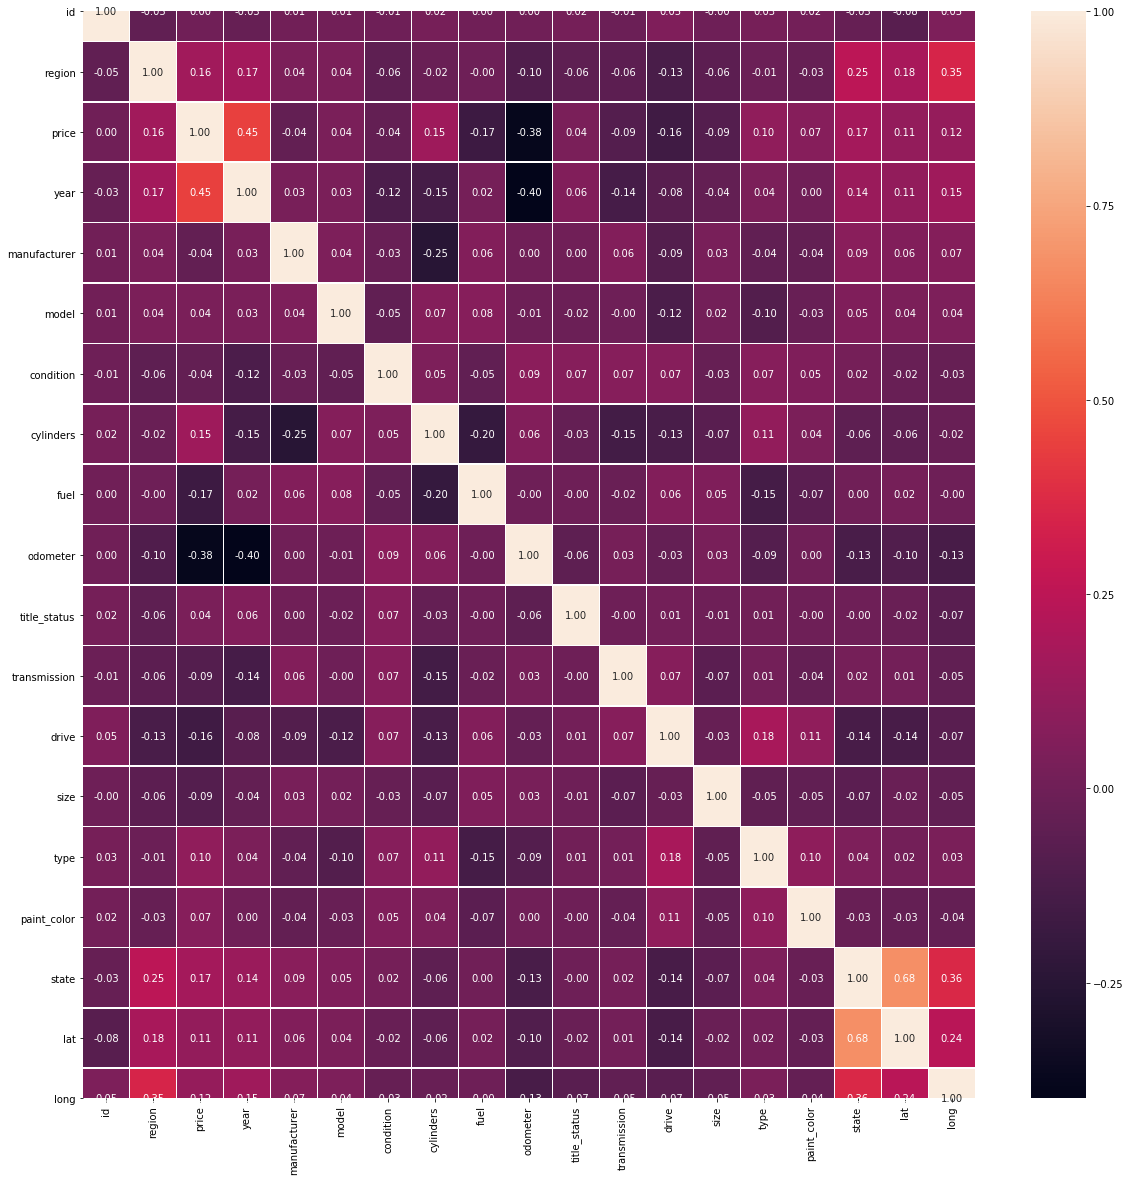

In [38]:
# melihat korelasi antar fitur/kolom dengan metode kendall rank correlation 
corr = data.corr(method='kendall')

# mapping tabel korelasi dengan matplotlib dan seaborn
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', ax=ax)
plt.show

# Scaling

In [39]:
# melakukan scaling terhadap fitur/kolom 'year' dan 'price' dengan range nilai [0 ~ 1] sebagai x
x_scale = ms(data, columns=['year', 'price'])

In [40]:
# melihat fitur/kolom 'year' dan 'price' setelah scaling
x_scale

,year,price
0,0.922330,0.000145
24,0.883495,0.000037
48,0.844660,0.000227
57,0.844660,0.000020
109,0.951456,0.000097
...,...,...
19919,0.941748,0.000089
19920,0.864078,0.000032
19927,0.970874,0.000097
19944,0.990291,0.000154


# Data Splitting 

In [41]:
# memotong data menjadi data train (80%) dan data test (20%)
x_train, x_test, y_train, y_test = train_test_split(x_scale, data['condition'],test_size = 0.2, random_state=42)

In [42]:
# melihat data train x
x_train

,year,price
13752,0.912621,0.000073
13537,0.912621,0.000152
8165,0.922330,0.000064
13499,0.864078,0.000058
10951,0.864078,0.000026
...,...,...
14915,0.883495,0.000040
1850,0.844660,0.000065
13249,0.689320,0.000012
16023,0.932039,0.000239


In [43]:
# melihat data test x
x_test

,year,price
14771,0.912621,0.000036
3475,0.854369,0.000045
7458,0.912621,0.000146
10040,0.776699,0.000028
794,0.834951,0.000023
...,...,...
12889,0.951456,0.000138
9690,0.834951,0.000045
16039,0.912621,0.000047
14929,0.922330,0.000073


In [44]:
# melihat data train y
y_train

13752    3
13537    2
8165     0
13499    3
10951    0
        ..
14915    0
1850     0
13249    2
16023    2
2788     2
Name: condition, Length: 3396, dtype: int32

In [45]:
# melihat data test y
y_test

14771    0
3475     0
7458     0
10040    2
794      1
        ..
12889    2
9690     0
16039    0
14929    0
9655     0
Name: condition, Length: 849, dtype: int32

In [46]:
# menyimpan dataset hasil eksplorasi x_train
x_train.to_csv("dataset_eksplorasi_xtrain.csv")

# menyimpan dataset hasil eksplorasi x_test
x_test.to_csv("dataset_eksplorasi_xtest.csv")

# menyimpan dataset hasil eksplorasi y_train
y_train.to_csv("dataset_eksplorasi_ytrain.csv")

# menyimpan dataset hasil eksplorasi y_test
y_test.to_csv("dataset_eksplorasi_ytest.csv")

C:\Users\BAGINDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\BAGINDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()
